# Microsoft Studios

## Overview


This project analyses potential content for Microsoft's new production studio. Discriptive analysis of movie data shows which movie genres are popular, production costs of top rated movies, and which formats of content audiances are responding to best.

## Business Problem

Microsoft's new production studio is wanting to gain insights for the current movie landscape to help make decisions about what kind of content show be made for their new streaming service to be competitive with other streaming service platforms.  

## Data Understanding

#### Imports

In [86]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris
from datetime import datetime
import numpy as np


#### Import zipfile and also unzip the IMDB file

In [87]:
import zipfile
with zipfile.ZipFile('./zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('./zippedData/')

#### Create connection to unzipped IMDB file

In [88]:
con = sqlite3.connect('./zippedData/im.db')
cursor = con.cursor()

#### Create dataframe 

In [89]:
IMDB_tables_db = pd.read_sql("""

SELECT *
FROM sqlite_master

""", con)

#### Create dataframe filtered by the movie_basics column

In [90]:
movie_basics_df = pd.read_sql("""

SELECT *
FROM movie_basics

""", con)

#### Sanity check

In [91]:
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


## Read in TMDB Movies CSV

In [92]:
movies = pd.read_csv("./zippedData/tmdb.movies.csv.gz")

#### Drop the Unnamed: 0 and original_language columns

In [93]:
movies.drop(columns = ['Unnamed: 0', 'original_language'], inplace = True)

#### Sort the popularity column by ascending values

In [94]:
movies = movies.sort_values('popularity', ascending = False)

#### Combine movies dataframe with the movie_basics dataframe 

In [95]:
combined_movies = movies.merge(movie_basics_df, how = 'inner', left_on = 'title', right_on = 'primary_title' )

#### Drop unneccesary columns

In [96]:
combined_movies.drop(columns = ['genre_ids', 'original_title_x', 'movie_id', 'primary_title', 'original_title_y', 'start_year' ], inplace = True)

#### Convert release_date column into a datetime 

In [97]:
combined_movies['release_date'] = pd.to_datetime(combined_movies['release_date'])

#### Filtered movies based on release date

In [98]:
combined_movies = combined_movies[(combined_movies['release_date'] > '2012-01-01') & (combined_movies['release_date'] < '2022-02-01')]

#### Cleaning the dataframe

In [99]:
combined_movies['genres'] = combined_movies['genres'].str.split(',')

In [100]:
x_bar = combined_movies['genres'].value_counts().index[:10].tolist()

In [101]:
x_list = []
for i in x_bar: 
    x_list.append(str(i))
x_list.reverse()

In [102]:
(x_list[0]).strip("[]")

"'Drama', 'Thriller'"

In [103]:
final_x = []
for i in x_list:
    i = i.strip("[]")
    i = i.strip("''")
    i = i.strip( "',")
    final_x.append(i)
final_x

["Drama', 'Thriller",
 "Comedy', 'Drama', 'Romance",
 "Drama', 'Romance",
 "Horror', 'Thriller",
 'Thriller',
 "Comedy', 'Drama",
 'Comedy',
 'Horror',
 'Documentary',
 'Drama']

In [104]:
the_final_x = []
for i in final_x:
    i = i.strip("[]")
    i = i.strip("''")
    i = i.strip( "',")
    i = i.strip(',')
    the_final_x.append(i)
the_final_x

["Drama', 'Thriller",
 "Comedy', 'Drama', 'Romance",
 "Drama', 'Romance",
 "Horror', 'Thriller",
 'Thriller',
 "Comedy', 'Drama",
 'Comedy',
 'Horror',
 'Documentary',
 'Drama']

In [105]:
final_final = []
for i in the_final_x: 
    i = i.replace("', '", ' & ')
    final_final.append(i)
final_final

['Drama & Thriller',
 'Comedy & Drama & Romance',
 'Drama & Romance',
 'Horror & Thriller',
 'Thriller',
 'Comedy & Drama',
 'Comedy',
 'Horror',
 'Documentary',
 'Drama']

#### Looking at the genre's value counts up to 10

In [106]:
y_bar = list(combined_movies['genres'].value_counts()[:10])

In [107]:
y_bar

[2531, 1960, 826, 753, 645, 570, 508, 441, 408, 379]

In [108]:
y_list = []
for i in y_bar: 
    y_list.append(i)
y_list.reverse()

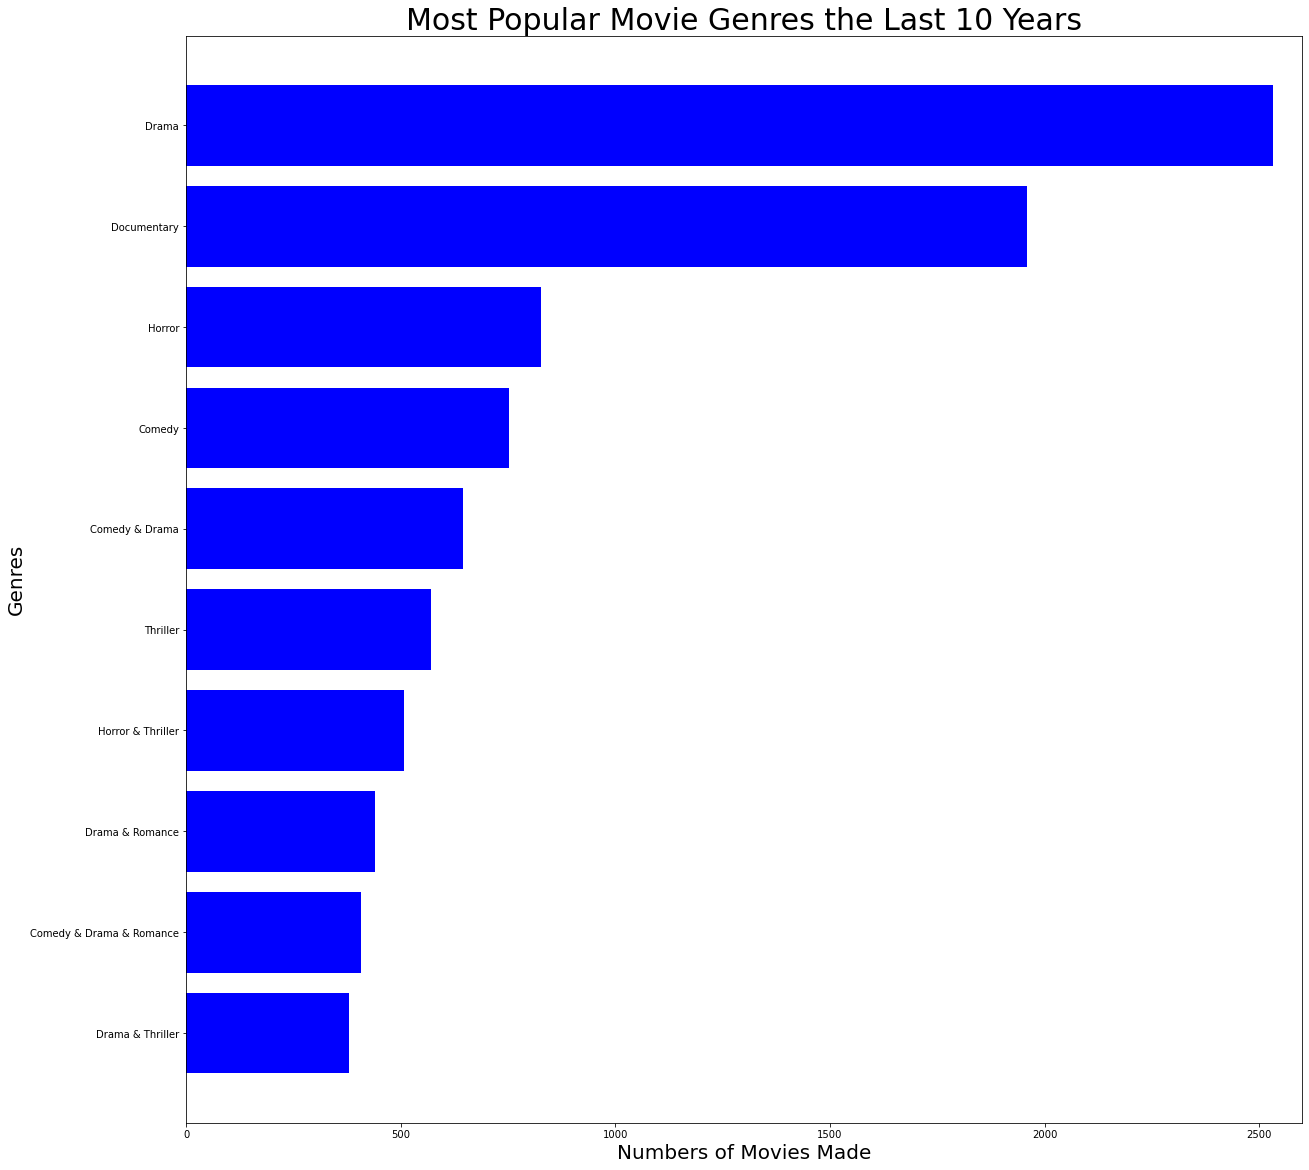

In [109]:
fig, ax = plt.subplots(figsize=(20,20))


plt.barh(width = y_list ,y = final_final, color = 'blue')


plt.xlabel('Numbers of Movies Made', fontsize=20)
plt.ylabel('Genres', fontsize=20)
plt.xlim([0, 2600])
plt.title('Most Popular Movie Genres the Last 10 Years', fontsize = 30)

plt.savefig('./Images/kyongmin_bar_chart.png', bbox_inches='tight')


plt.show()



## Read in HBO Max CSV

In [110]:
HBO_max_content = pd.read_csv('./zippedData/HBO_MAX_Content.csv')

#### Sanity check

In [111]:
HBO_max_content.head()

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_shudder,platforms_starz,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm
0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Rick and Morty,TV,2013,R/TV-MA,9.2,94.0,2010-2019,9.01-9.50,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Lord of the Rings: The Fellowship of the Ring,NaN,2001,PG-13/TV-14,8.8,91.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Fight Club,NaN,1999,R/TV-MA,8.8,79.0,1990-1999,8.51-9.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Two Towers,NaN,2002,PG-13/TV-14,8.7,95.0,2000-2009,8.51-9.00,1,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
HBO_max_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 75 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   title                                 2087 non-null   object 
 1   type                                  375 non-null    object 
 2   year                                  2087 non-null   int64  
 3   rating                                1537 non-null   object 
 4   imdb_score                            2025 non-null   float64
 5   rotten_score                          1365 non-null   float64
 6   decade                                2087 non-null   object 
 7   imdb_bucket                           2025 non-null   object 
 8   genres_Action_Adventure               2087 non-null   int64  
 9   genres_Animation                      2087 non-null   int64  
 10  genres_Anime                          2087 non-null   int64  
 11  genres_Biography 

#### Check for duplicated records

In [113]:
HBO_max_content.duplicated().sum() 

12

In [114]:
#remove duplicated records but keep first

HBO_max_content.drop_duplicates(keep='first',inplace=True) 

In [115]:
#sanity check

HBO_max_content.duplicated().sum() 

0

In [116]:
HBO_max_content['type'].value_counts()

TV    373
Name: type, dtype: int64

In [117]:
#fill NaN with Movies/Other

HBO_max_content['type'] = HBO_max_content["type"].fillna('Movies/Other') 

In [118]:
HBO_counts = HBO_max_content['type'].value_counts(normalize=True).tolist()
HBO_counts

[0.8202409638554217, 0.1797590361445783]

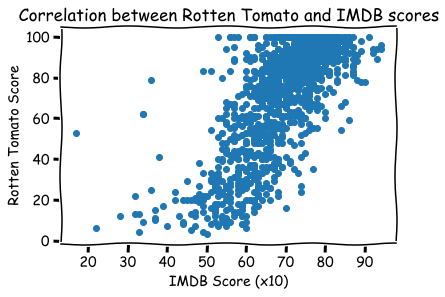

In [119]:
with plt.xkcd():
    fig, ax = plt.subplots()

    X = HBO_max_content['imdb_score']*10 # *10 used to scale score to be the same as rotten score
    y = HBO_max_content['rotten_score']
    ax.scatter(X, y)
    ax.set_title('Correlation between Rotten Tomato and IMDB scores')
    ax.set_xlabel('IMDB Score (x10)')  
    ax.set_ylabel('Rotten Tomato Score')
    ax.annotate('minimum!', xy=(0, 0), xytext=(1, -4),
                arrowprops={'facecolor': 'black'})

In [120]:
Top_10_imdb = HBO_max_content.sort_values(by= ['imdb_score'],ascending=False).head(10)

In [121]:
Top_10_imdb['imdb_score']

1592    9.9
1669    9.8
8       9.4
23      9.4
0       9.3
16      9.3
1       9.2
30      9.2
1100    9.2
1677    9.2
Name: imdb_score, dtype: float64

In [122]:
Top_10_rt = HBO_max_content.sort_values(by= ['rotten_score'],ascending=False).head(10)

In [123]:
Top_10_rt['rotten_score']

864    100.0
286    100.0
901    100.0
877    100.0
874    100.0
873    100.0
258    100.0
870    100.0
262    100.0
869    100.0
Name: rotten_score, dtype: float64

#### Looking the the two scoring columns. We have seen that these score are positively correlated but the rotten tomato scores have hundreds more null values and lack resolution for the top scores which we will be using in our analaysis. Moving forward we will use IMDB scores as our preformace metric.

In [124]:
Top_100_HBO = HBO_max_content.sort_values(by= ['imdb_score'],ascending=False).head(100) 

In [125]:
# collect counts by type

top_100_counts = Top_100_HBO['type'].value_counts().tolist() 

In [126]:
Top_100_HBO.head(10)

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_shudder,platforms_starz,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm
1592,El Astronauta,Movies/Other,2018,PG/TV-PG,9.9,NaN,2010-2019,9.51-10,0,0,...,0,0,0,0,0,0,0,0,0,0
1669,Wonder,Movies/Other,2019,NaN,9.8,NaN,2010-2019,9.51-10,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Chernobyl,TV,2019,R/TV-MA,9.4,96.0,2010-2019,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Band of Brothers,TV,2001,R/TV-MA,9.4,94.0,2000-2009,9.01-9.50,1,0,...,0,0,0,0,0,0,0,0,0,0
0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,0,...,0,0,0,0,0,0,0,0,0,0
16,The Wire,TV,2002,R/TV-MA,9.3,94.0,2000-2009,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rick and Morty,TV,2013,R/TV-MA,9.2,94.0,2010-2019,9.01-9.50,1,1,...,0,0,0,0,0,0,0,0,0,0
30,The Sopranos,TV,1999,R/TV-MA,9.2,92.0,1990-1999,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0
1100,The World Between Us,TV,2019,NaN,9.2,NaN,2010-2019,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,Wednesday,Movies/Other,2020,NaN,9.2,NaN,2020-2029,9.01-9.50,0,0,...,0,0,0,0,0,0,0,0,0,0


## Load Netflix Data

In [127]:
Netflix_data = pd.read_csv('./zippedData/netflix_titles.csv')

In [128]:
Netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [129]:
# check for duplicates

Netflix_data.duplicated().sum() 

0

In [130]:
Netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [131]:
# get values counts by type

Netflix_counts = Netflix_data['type'].value_counts(normalize=True).tolist() 

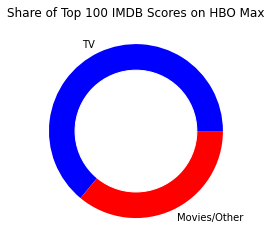

In [132]:
# library
import matplotlib.pyplot as plt

# create data
top_100_counts = Top_100_HBO['type'].value_counts().tolist()
names = ['TV','Movies/Other']
color=['b','r']
# Create a pieplot
plt.pie(top_100_counts,labels=names,colors=color)
plt.title("Share of Top 100 IMDB Scores on HBO Max")
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('./Images/Marshall_pie_chart.png', bbox_inches='tight')
plt.show()

In [133]:
Netflix_counts = [Netflix_counts[0]*100,Netflix_counts[1]*100]
Netflix_counts

[69.61507891449983, 30.38492108550017]

In [134]:
HBO_counts = [HBO_counts[0]*100,HBO_counts[1]*100]
HBO_counts

[82.02409638554217, 17.97590361445783]

In [135]:
movie_counts=[Netflix_counts[0],HBO_counts[0]]

In [136]:
tv_counts=[Netflix_counts[1],HBO_counts[1]]

No handles with labels found to put in legend.


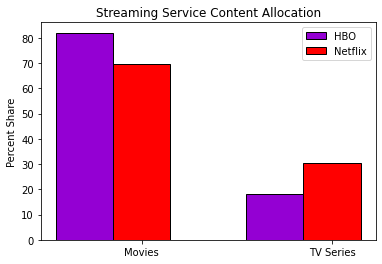

In [137]:
# width of the bars
barWidth = 0.3
 
bars1 = HBO_counts

bars2 = Netflix_counts
 

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, width = barWidth, color = 'darkviolet', edgecolor = 'black', capsize=7, label='HBO')
 

plt.bar(r2, bars2, width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label='Netflix')
 

plt.xticks([r + barWidth for r in range(len(bars1))], ['Movies', 'TV Series'])
plt.ylabel('Percent Share')
plt.legend()

plt.title('Streaming Service Content Allocation')
ax.legend()
plt.savefig('./Images/Marshall_bar_chart.png', bbox_inches='tight')
plt.show() 



## Read In Box Office Mojo CSV

In [138]:
df_movie_gross = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")

#### Check for any null values

In [139]:
df_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

####  Drop all null values for the domestic_gross column

In [140]:
df_movie_domgross = df_movie_gross.dropna(subset=['domestic_gross'])

#### Sanity check to ensure the null values were actually dropped

In [141]:
df_movie_domgross.shape

(3359, 5)

#### Drop the studio and foreign_gross columns, since they are not needed for our analysis

In [142]:
df_movie_gross_cleaned = df_movie_domgross.drop(columns=['studio','foreign_gross'])

## Read in The Numbers CSV

In [143]:
df_tn_movie_budgets = pd.read_csv("./zippedData/tn.movie_budgets.csv.gz")

In [144]:
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


#### Drop the worldwide_gross column since it is not needed for our analysis

In [145]:
df_tn_movie_budgets_domgross = df_tn_movie_budgets.drop(columns=['worldwide_gross'])

#### Sanity Check

In [146]:
df_tn_movie_budgets_domgross

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382"
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


#### Check for any null values

In [147]:
df_tn_movie_budgets_domgross.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
dtype: int64

#### Remove unneccesary characters & convert domestic_gross column into integers

In [148]:
def clean_domgross(row):
    if isinstance(row,str):
        domestic_gross = row.replace('$', '')
        domestic_gross = int(domestic_gross.replace(',', ''))
    else:
        domestic_gross = None
    return domestic_gross

In [149]:

df_tn_movie_budgets_domgross['domestic_gross'] = df_tn_movie_budgets_domgross['domestic_gross'].apply(clean_domgross)

#### Sanity Check

In [150]:
df_tn_movie_budgets_domgross

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0
5778,79,"Apr 2, 1999",Following,"$6,000",48482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0


#### Sort domestic_gross by ascending values

In [151]:
df_tn_movie_budgets_domgross.sort_values('domestic_gross', ascending = False)

,id,release_date,movie,production_budget,domestic_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000",936662225
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625
41,42,"Feb 16, 2018",Black Panther,"$200,000,000",700059566
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482
42,43,"Dec 19, 1997",Titanic,"$200,000,000",659363944
...,...,...,...,...,...
2709,10,"Mar 31, 2004",The Touch,"$20,000,000",0
2708,9,"Apr 13, 2010",Three Kingdoms: Resurrection of the Dragon,"$20,000,000",0
2707,8,"Dec 31, 2012",Zambezia,"$20,000,000",0
2706,7,"Dec 31, 2008",Admiral,"$20,000,000",0


#### Remove unneccesary characters & convert production_budget column into integers

In [152]:
def clean_prodbud(row):
    if isinstance(row,str):
        production_budget = row.replace('$', '')
        production_budget = int(production_budget.replace(',', ''))
    else:
        production_budget = None
    return production_budget

In [153]:

df_tn_movie_budgets_domgross['production_budget'] = df_tn_movie_budgets_domgross['production_budget'].apply(clean_domgross)

#### Check the top 10 domestic_gross values & save it as its own variable

In [154]:
df_tn_movie_budgets_domgross.head(10)

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295
9,10,"Nov 6, 2015",Spectre,300000000,200074175


In [155]:
df_tn_movie_budgets_head = df_tn_movie_budgets_domgross.head(10)

## Read in HBO Max CSV

In [156]:
hbomax_data = pd.read_csv('./zippedData/HBO_MAX_Content.csv')

#### Merge the movie_gross data with the HBO Max data set

In [157]:
hbomax_df = hbomax_data.merge(df_movie_gross,how='inner')

#### Sanity check

In [158]:
hbomax_df

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm,studio,domestic_gross,foreign_gross
0,Wonder Woman,NaN,2017,PG-13/TV-14,7.4,93.0,2010-2019,7.01-7.50,1,0,...,0,0,0,0,0,0,0,WB,412600000.0,409300000
1,Wonder Woman,NaN,2017,PG-13/TV-14,7.4,93.0,2010-2019,7.01-7.50,1,1,...,0,0,0,0,0,0,0,WB,412600000.0,409300000
2,La La Land,NaN,2016,PG-13/TV-14,8.0,91.0,2010-2019,7.51-8.00,0,0,...,0,0,0,0,0,0,0,LG/S,151100000.0,295000000
3,Prisoners,NaN,2013,R/TV-MA,8.1,81.0,2010-2019,8.01-8.50,0,0,...,0,0,0,0,0,0,0,WB,61000000.0,61100000
4,X-Men: First Class,NaN,2011,PG-13/TV-14,7.7,86.0,2010-2019,7.51-8.00,1,0,...,0,0,0,0,0,0,0,Fox,146400000.0,207200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Holy Rollers,NaN,2010,R/TV-MA,5.9,52.0,2010-2019,5.01-6.00,0,0,...,0,0,0,0,0,0,0,FInd.,303000.0,305000
91,Incarnate,NaN,2016,PG-13/TV-14,5.3,18.0,2010-2019,5.01-6.00,0,0,...,0,0,0,0,0,0,0,BH Tilt,4800000.0,1500000
92,Alpha and Omega,NaN,2010,PG/TV-PG,5.2,16.0,2010-2019,5.01-6.00,1,1,...,0,0,0,0,0,0,0,LGF,25100000.0,25400000
93,Salinger,NaN,2013,PG-13/TV-14,6.7,36.0,2010-2019,6.01-7.00,0,0,...,0,0,0,0,0,0,0,Wein.,584000.0,67000


#### Merge the above dataframe with movie_budgets

In [159]:
hbomax_merged_df = hbomax_df.merge(df_tn_movie_budgets,how='inner',
                       left_on= 'title',
                       right_on= 'movie')

#### Clean unneccesary characters from domestic_gross and convert column to integers

In [160]:
def clean_domgross(row):
    if isinstance(row,str):
        domestic_gross_y = row.replace('$', '')
        domestic_gross_y = int(domestic_gross_y.replace(',', ''))
    else:
        domestic_gross_y = None
    return domestic_gross_y

In [161]:

hbomax_merged_df['domestic_gross_y'] = hbomax_merged_df['domestic_gross_y'].apply(clean_domgross)

#### Clean unneccesary characters from production_budget and convert column to integers

In [162]:
def clean_prodbud(row):
    if isinstance(row,str):
        production_budget = row.replace('$', '')
        production_budget = int(production_budget.replace(',', ''))
    else:
        production_budget = None
    return production_budget

In [163]:

hbomax_merged_df['production_budget'] = hbomax_merged_df['production_budget'].apply(clean_prodbud)

#### Sort IMDB score values by ascending order and look at the top 50 

In [164]:
hbomax_imdb_score_sorted_df = hbomax_merged_df.sort_values('imdb_score', ascending=False)

In [165]:
hbomax_imdb_score_sorted_head_df = hbomax_imdb_score_sorted_df.head(50)

#### Check for null values

In [166]:
hbomax_imdb_score_sorted_df.duplicated().sum()

0

#### Sort IMDB score by production_budget column

In [167]:
hbomax_production_budget = hbomax_imdb_score_sorted_head_df['production_budget']

#### Convert production_budget values for readability 

In [168]:
div_millions = hbomax_production_budget/1000000

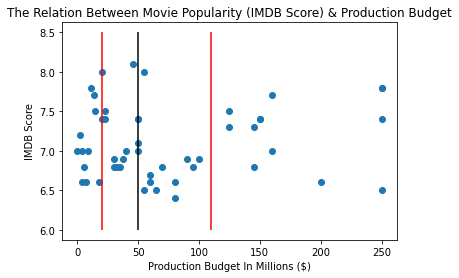

In [169]:
fig, ax = plt.subplots()


ax.scatter(div_millions, 
           hbomax_imdb_score_sorted_head_df['imdb_score']);

ax.vlines(x=20, ymin=6, ymax=8.5, colors='r'),
ax.vlines(x=50, ymin=6, ymax=8.5, colors='k'),
ax.vlines(x=110, ymin=6, ymax=8.5, colors='r')

ax.set_title("The Relation Between Movie Popularity (IMDB Score) & Production Budget")
plt.xlabel("Production Budget In Millions ($)")
plt.ylabel('IMDB Score')

plt.savefig('./Images/IMDB_Pop_Budget_Scatter')


plt.show()

## Conclusions

#### Recommendations:

##### Produce content in the Drama, Documentatary, and Horror genres.

#### Set a budget between 20 and 110 million dollars. 

#### Allocate the content between movies and TV series.
